In [ ]:
import pandas as pd
df=pd.read_csv("/content/PriceDataSet.csv")
print(df.to_string())

    weight  price
0        1     10
1        2     20
2        3     25
3        4     40
4        5     45
5        6     75
6        7     90
7        8    100
8        9    115
9       10    120
10      11    130
11      12    132
12      13    140
13      14    160
14      15    165


In [ ]:
df.head()
df.head(8)

,weight,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,45
5,6,75
6,7,90
7,8,100


import numpy as np
from google.colab import autoviz
df_5732731946611984513 = autoviz.get_df('df_5732731946611984513')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5732731946611984513, *['weight'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5732731946611984513 = autoviz.get_df('df_5732731946611984513')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5732731946611984513, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5732731946611984513 = autoviz.get_df('df_5732731946611984513')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5732731946611984513, *['weight'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5732731946611984513 = autoviz.get_df('df_5732731946611984513')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5732731946611984513, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5732731946611984513 = autoviz.get_df('df_5732731946611984513')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5732731946611984513, *[[['weight', 'price']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5732731946611984513 = autoviz.get_df('df_5732731946611984513')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5732731946611984513, *['weight', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5732731946611984513 = autoviz.get_df('df_5732731946611984513')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5732731946611984513, *['price', 'count()', None], **{})
chart

In [ ]:
print(df.tail())


    weight  price
10      11    130
11      12    132
12      13    140
13      14    160
14      15    165


In [ ]:
print(df.tail(8))

    weight  price
7        8    100
8        9    115
9       10    120
10      11    130
11      12    132
12      13    140
13      14    160
14      15    165


In [ ]:
df.corr()

,weight,price
weight,1.000000,0.989168
price,0.989168,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  15 non-null     int64
 1   price   15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


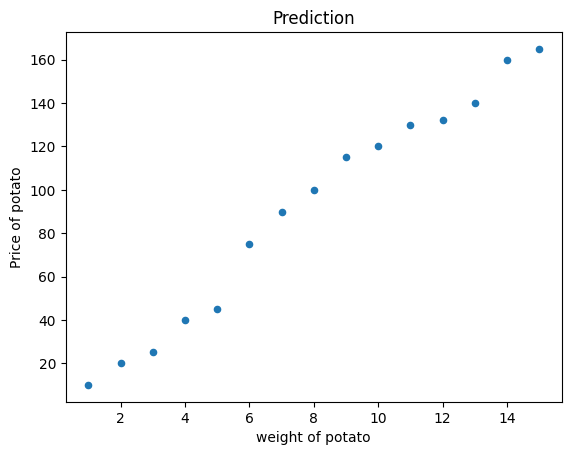

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'weight', y = 'price')
plt.xlabel('weight of potato')
plt.ylabel('Price of potato')
plt.title('Prediction')
plt.show()

<Axes: ylabel='Frequency'>

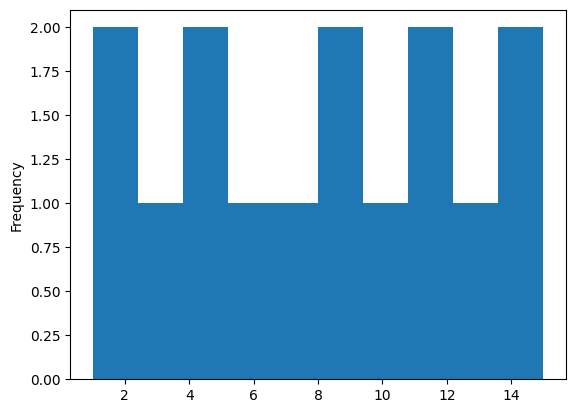

In [ ]:
df["weight"].plot(kind = 'hist')


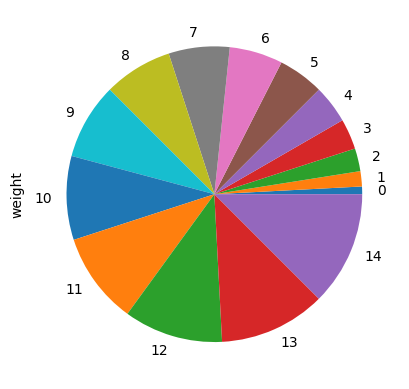

In [ ]:
df["weight"].plot(kind = 'pie')
plt.show()

In [ ]:
new_df=pd.read_csv("/content/newPriceDataSet.csv")
print(new_df.to_string())



    weight  price
0      1.0     10
1      2.0     20
2      3.0     25
3      NaN     40
4      5.0     45
5      6.0     75
6      7.0     90
7      8.0    100
8      9.0    115
9      NaN    120
10    11.0    130
11    12.0    132
12    13.0    140
13    14.0    160
14    15.0    165


In [ ]:
df1 = new_df.dropna()
print(df1)

    weight  price
0      1.0     10
1      2.0     20
2      3.0     25
4      5.0     45
5      6.0     75
6      7.0     90
7      8.0    100
8      9.0    115
10    11.0    130
11    12.0    132
12    13.0    140
13    14.0    160
14    15.0    165


In [ ]:
df2 = new_df.fillna(50)
print(df2)

    weight  price
0      1.0     10
1      2.0     20
2      3.0     25
3     50.0     40
4      5.0     45
5      6.0     75
6      7.0     90
7      8.0    100
8      9.0    115
9     50.0    120
10    11.0    130
11    12.0    132
12    13.0    140
13    14.0    160
14    15.0    165


In [ ]:
x= new_df['weight'].mean()
df2 = new_df.fillna(50)
print(x)

8.153846153846153


In [ ]:
x= new_df['weight'].median()
df2 = new_df.fillna(50)
print(x)

8.0


In [ ]:
x= new_df['weight'].mode()[0]
df2 = new_df.fillna(50)
print(x)

1.0


In [ ]:
print(new_df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool


In [ ]:
new_df=pd.read_csv("/content/newPriceDataSet_duplicated.csv")
print(new_df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16     True
dtype: bool


In [ ]:

df2 = new_df.fillna(50)
y=df2.drop_duplicates()

print(y)

    weight  price
0      1.0     10
1      2.0     20
2      3.0     25
3     50.0     40
4      5.0     45
5      6.0     75
6      7.0     90
7      8.0    100
8      9.0    115
9     50.0    120
10    11.0    130
11    12.0    132
12    13.0    140
13    14.0    160
14    15.0    165


In [ ]:
new_df.describe()

,weight,price
count,15.000000,17.000000
mean,8.933333,98.352941
std,4.787882,53.167120
min,1.000000,10.000000
25%,5.500000,45.000000
50%,9.000000,115.000000
75%,13.000000,140.000000
max,15.000000,165.000000


In [ ]:

basar kaj
matplotlib
reggrasion model